In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-bike-sales-dataset-2013-2023/bike_sales_data_world_2013_2023.csv


![](https://cdnp.flypgs.com/files/Ekstrem_Sporlar/dag-bisikleti-sporu-nedir.jpg)

# VERİ SETİ KONUSU
**Satış Veri Seti (2013-2023)**

Bu veri seti yalnızca eğitim amaçlı hazırlanmış bir örnek veri setidir ve 2013-2023 yılları arasında Avrupa ve belirli küresel bölgelerdeki (Kanada, ABD, Avustralya vb.) bisiklet satışlarına ilişkin temsil edici örnek veriler içermektedir. Veri setinin amacı, veri analizinin farklı yöntemlerini öğrenmek ve bu alanda pratik yapmaktır. Bu veri setinde yer alan hiçbir materyal bilimsel araştırmalarda, ticari amaçlarla veya herhangi bir karar verme sürecinde kullanılmamalıdır.

**Ana Özellikler:**

1. Zaman Aralığı: 2013-2023
2. Kapsanan Ülkeler: Avrupa ve küresel bölgeler (Kanada, ABD, Avustralya vb.)
3. Satış Metrikleri: Birim maliyet, birim fiyat, kâr, gelir ve kargo maliyeti
4. Müşteri Demografisi: Müşterilerin yaş, cinsiyet ve ülke bilgileri
5. Ürün Özellikleri: Ürün kategorileri, boyutlar, renkler, malzemeler ve garanti bilgileri
6. Lojistik: Kargo şirketleri, teslimat süreleri ve iade politikaları

**Potansiyel Kullanım Alanları:**

* Farklı ülkelerde ve yıllar arasında satış trendlerini analiz etmeyi öğrenmek
* Müşteri davranışları ve ürün tercihlerine yönelik keşifsel veri analizi yapmak
* Ürün fiyatlandırması, indirimler ve bunların kârlılık üzerindeki etkilerini incelemek
* Müşteri demografisinin satış performansını nasıl etkilediğini keşfetmek
* Bu veri seti, öğrencilerin, eğitmenlerin ve veri bilimi ile iş analitiğine yeni başlayanların güvenli bir eğitim ortamında becerilerini   geliştirmelerine yardımcı olmak için tasarlanmıştır. Bilimsel araştırmalarda, ticari analizlerde veya iş kararlarında kullanılması uygun değildir.


![](https://st2.depositphotos.com/1003593/5365/i/950/depositphotos_53656519-stock-photo-sales-growth-graph.jpg)

# KULLANILACAK KÜTÜPHANELERİN YÜKLENMESİ 

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder

import random

# VERİ SETİNİ ÇEKME İŞLEMİ 

In [3]:
df=pd.read_csv('/kaggle/input/global-bike-sales-dataset-2013-2023/bike_sales_data_world_2013_2023.csv')

Aşağıda bilgi ve bilgi_mini adlı iki fonksiyon yazdım. Bunların nedeni tek seferde birden fazla metriği kontrol etmek amaçlanmıştır

In [4]:
def bilgi(data = df):
    # info kısmı
    print("\033[1m\033[31m" + "GENEL BİLGİ" + "\033[0m") 
    print("-" * 40)
    print(df.info())
    print("-" * 100)

    # Boyut kısmı
    print("-" * 40)
    print(df.shape)
    print("-" * 100)

    # Describe kısmı
    print("\033[1m\033[31m" + "VERİ SETİ HAKKINDA SAYISAL DEĞERLER" + "\033[0m")  
    print("-" * 40)
    print(df.describe())  
    print("-" * 100)

    # İlk 5 satır
    print("\033[1m\033[31m" + "İLK 5 SATIR" + "\033[0m")  
    print("-" * 40)
    print(df.head(5))  
    print("-" * 100)

    # Eksik değerler
    print("\033[1m\033[31m" + "EKSIK DEĞERLER" + "\033[0m") 
    print("-" * 40)
    print(df.isna().sum())  
    print("-" * 100)

# Fonksiyonu çağıralım
bilgi(df)


GENEL BİLGİ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226072 entries, 0 to 226071
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              226072 non-null  object 
 1   Day               226072 non-null  int64  
 2   Month             226072 non-null  object 
 3   Year              226072 non-null  int64  
 4   Customer_Age      226072 non-null  int64  
 5   Age_Group         226072 non-null  object 
 6   Customer_Gender   226072 non-null  object 
 7   Country           226072 non-null  object 
 8   State             226072 non-null  object 
 9   Product_Category  226072 non-null  object 
 10  Sub_Category      226072 non-null  object 
 11  Product           226072 non-null  object 
 12  Order_Quantity    226072 non-null  int64  
 13  Unit_Cost         226072 non-null  int64  
 14  Unit_Price        226072 non-null  int64  
 15  Profit         

In [5]:
def bilgi_mini(data = df):
     # info kısmı
    print("\033[1m\033[31m" + "GENEL BİLGİ" + "\033[0m") 
    print("-" * 40)
    print(df.info())
    print("-" * 100)

    # İlk 5 satır
    print("\033[1m\033[31m" + "İLK 5 SATIR" + "\033[0m")  
    print("-" * 40)
    print(df.head(5))  
    print("-" * 100)


bilgi_mini(df)
    
    

GENEL BİLGİ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226072 entries, 0 to 226071
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              226072 non-null  object 
 1   Day               226072 non-null  int64  
 2   Month             226072 non-null  object 
 3   Year              226072 non-null  int64  
 4   Customer_Age      226072 non-null  int64  
 5   Age_Group         226072 non-null  object 
 6   Customer_Gender   226072 non-null  object 
 7   Country           226072 non-null  object 
 8   State             226072 non-null  object 
 9   Product_Category  226072 non-null  object 
 10  Sub_Category      226072 non-null  object 
 11  Product           226072 non-null  object 
 12  Order_Quantity    226072 non-null  int64  
 13  Unit_Cost         226072 non-null  int64  
 14  Unit_Price        226072 non-null  int64  
 15  Profit         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226072 entries, 0 to 226071
Data columns (total 33 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Date              226072 non-null  object 
 1   Day               226072 non-null  int64  
 2   Month             226072 non-null  object 
 3   Year              226072 non-null  int64  
 4   Customer_Age      226072 non-null  int64  
 5   Age_Group         226072 non-null  object 
 6   Customer_Gender   226072 non-null  object 
 7   Country           226072 non-null  object 
 8   State             226072 non-null  object 
 9   Product_Category  226072 non-null  object 
 10  Sub_Category      226072 non-null  object 
 11  Product           226072 non-null  object 
 12  Order_Quantity    226072 non-null  int64  
 13  Unit_Cost         226072 non-null  int64  
 14  Unit_Price        226072 non-null  int64  
 15  Profit            226072 non-null  int64  
 16  Cost              22

# VERİ ÖN İŞLEME

Sütun isimlerini türkçe isimlere dönüştürürdü.

In [7]:
turkce_isimleri = [
    "Tarih", "Gün", "Ay", "Yıl", "Müşteri_Yaşı", "Yaş_Grubu",
    "Müşteri_Cinsiyet", "Ülke", "Eyalet", "Ürün_Kategorisi",
    "Alt_Kategori", "Ürün", "Sipariş_Miktarı", "Birim_Maliyet",
    "Birim_Fiyat", "Kar", "Maliyet", "Gelir", "Beden",
    "Renk", "Malzeme", "Garanti", "Üretici", "Değerlendirme",
    "Kargo_Ağırlığı", "Teslimat_Süresi", "İndirim", "Çevre_Dostu",
    "Kargo_Maliyeti", "Kargo_Firması", "Kargo_Türü", "Sigorta",
    "İade_Politikası"
]

# Sütun isimlerini Türkçe'ye çevirme
df.columns = turkce_isimleri


In [8]:
#VERİ SETİNDEKİ SÜTUNLARIN BAZI SAYISAL DEĞERLERİ GÖZLEMLENDİ 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gün,226072.0,15.665753,8.781547,1.0,8.00,16.00,23.00,31.0
Yıl,226072.0,2017.992887,3.163415,2013.0,2015.00,2018.00,2021.00,2023.0
Müşteri_Yaşı,226072.0,35.919212,11.021911,17.0,28.00,35.00,43.00,87.0
Sipariş_Miktarı,226072.0,11.901660,9.561836,1.0,2.00,10.00,20.00,32.0
Birim_Maliyet,226072.0,267.296366,549.834267,1.0,2.00,9.00,42.00,2171.0
Birim_Fiyat,226072.0,452.938427,922.069180,2.0,5.00,24.00,70.00,3578.0
Kar,226072.0,285.051665,453.886439,-30.0,29.00,101.00,358.00,15096.0
Maliyet,226072.0,469.318695,884.864161,1.0,28.00,108.00,432.00,42978.0
Gelir,226072.0,754.370360,1309.091778,2.0,63.00,223.00,800.00,58074.0
Değerlendirme,226072.0,3.005724,1.416783,1.0,2.00,3.00,4.00,5.0


In [9]:
#VERİ SETİNDEKİ EKSİK DEĞERLERİ GÖZLEMLEME VE KAÇ ADET OLDUĞUNU GÖRME AMAÇLANMIŞTIR
df.isna().sum()

Tarih                   0
Gün                     0
Ay                      0
Yıl                     0
Müşteri_Yaşı            0
Yaş_Grubu               0
Müşteri_Cinsiyet        0
Ülke                    0
Eyalet                  0
Ürün_Kategorisi         0
Alt_Kategori            0
Ürün                    0
Sipariş_Miktarı         0
Birim_Maliyet           0
Birim_Fiyat             0
Kar                     0
Maliyet                 0
Gelir                   0
Beden                   0
Renk                    0
Malzeme                 0
Garanti                 0
Üretici                 0
Değerlendirme           0
Kargo_Ağırlığı          0
Teslimat_Süresi         0
İndirim                 0
Çevre_Dostu             0
Kargo_Maliyeti          0
Kargo_Firması           0
Kargo_Türü              0
Sigorta             75282
İade_Politikası         0
dtype: int64

In [10]:
# Veri setinde rasgele eksik veriler oluşturalım.
def add_random_missing_values(dataframe: pd.DataFrame,
                              missing_rate: float = 0.05,
                              seed: random = 42) -> pd.DataFrame:
    """Turns random values to NaN in a DataFrame.
    
    To use this function, you need to import pandas, numpy and random libraries.

    Args:
        dataframe (pd.DataFrame): DataFrame to be processed.
        missing_rate (float): Percentage of missing value rate in float format. Defaults 0.05

    
    """
    # Get copy of dataframe
    df_missing = dataframe.copy()

    # Obtain size of dataframe and number total number of missing values
    df_size = dataframe.size
    num_missing = int(df_size * missing_rate)
    
    # Set seed
    if seed:
        random.seed(seed)

    # Get random row and column indexes to turn them NaN
    for _ in range(num_missing):
        row_idx = random.randint(0, dataframe.shape[0] - 1)
        col_idx = random.randint(0, dataframe.shape[1] - 1)

        df_missing.iat[row_idx, col_idx] = np.nan
        
    return df_missing

df = add_random_missing_values(dataframe = df,
                               missing_rate = 0.03)

/tmp/ipykernel_17/331932247.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'nan' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_missing.iat[row_idx, col_idx] = np.nan


In [11]:
#RASTGELE EKSİK VERİ OLUŞMUŞ MU DİYE KONRTOL EDİYORUZ.
df.isnull().sum()

Tarih                6715
Gün                  6659
Ay                   6663
Yıl                  6624
Müşteri_Yaşı         6674
Yaş_Grubu            6709
Müşteri_Cinsiyet     6718
Ülke                 6693
Eyalet               6712
Ürün_Kategorisi      6691
Alt_Kategori         6672
Ürün                 6770
Sipariş_Miktarı      6657
Birim_Maliyet        6559
Birim_Fiyat          6608
Kar                  6748
Maliyet              6709
Gelir                6610
Beden                6750
Renk                 6838
Malzeme              6601
Garanti              6649
Üretici              6613
Değerlendirme        6692
Kargo_Ağırlığı       6602
Teslimat_Süresi      6590
İndirim              6621
Çevre_Dostu          6786
Kargo_Maliyeti       6663
Kargo_Firması        6576
Kargo_Türü           6699
Sigorta             79802
İade_Politikası      6730
dtype: int64

In [12]:
#BİR DÖNGÜ İLE SÜTÜNLARDA Kİ BENZERSİZ DEĞERLERİ GÖZLEMLİYORUZ
#BUNUN YAPMAM SEBEBİMİZ HER SÜTÜNDA GÖZLEMLER YAPARAK ONLARA UYGUN GRAFİK VB İŞLEMLERİ YAPMAMINIZ SAĞLAR 
for column in df.select_dtypes(include='object').columns:
    print(f"Sütun: {column}")
    print("Benzersiz Değerler:", df[column].unique())
    print("-" * 40)


Sütun: Tarih
Benzersiz Değerler: ['2017-11-26' '2014-11-26' '2019-03-23' ... '2023-08-11' '2022-08-22'
 '2023-07-11']
----------------------------------------
Sütun: Ay
Benzersiz Değerler: ['November' 'March' 'May' 'February' 'July' nan 'August' 'September'
 'January' 'December' 'June' 'October' 'April']
----------------------------------------
Sütun: Yaş_Grubu
Benzersiz Değerler: ['Youth (<25)' 'Adults (35-64)' nan 'Young Adults (25-34)' 'Seniors (64+)']
----------------------------------------
Sütun: Müşteri_Cinsiyet
Benzersiz Değerler: ['M' 'F' nan]
----------------------------------------
Sütun: Ülke
Benzersiz Değerler: ['Canada' 'Australia' 'United States' 'Germany' 'France' 'United Kingdom'
 nan 'Austria' 'Denmark' 'Slovakia' 'Estonia' 'Bulgaria' 'Malta'
 'Lithuania' 'Finland' 'Poland' 'Italy' 'Netherlands' 'Romania' 'Slovenia'
 'Ireland' 'Luxembourg' 'Portugal' 'Latvia' 'Sweden' 'Spain' 'Croatia'
 'Greece' 'Belgium' 'Czech Republic' 'Hungary']
-----------------------------------

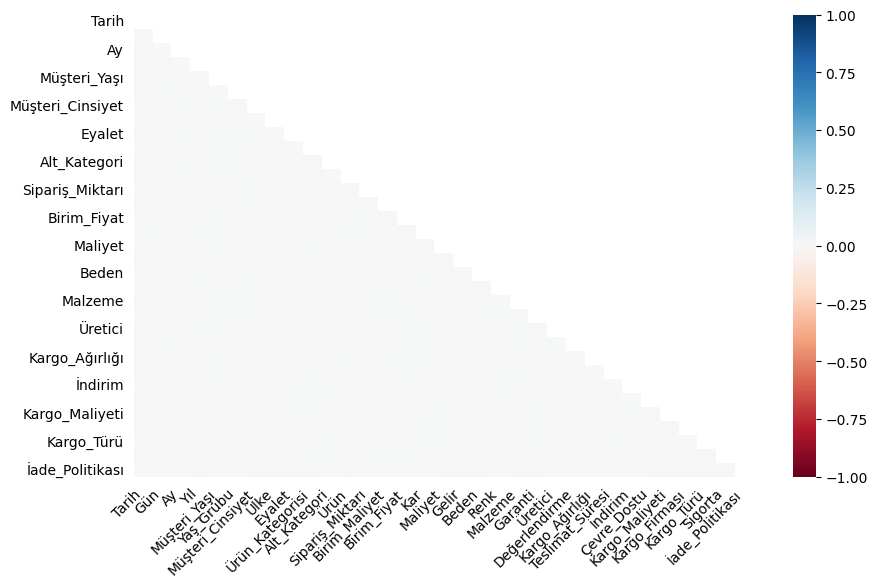

In [13]:
#Heatmap
# 1'e ne kadar yakınsa, ilişki ihtimali o kadar yüksek.
# 0 ise, birbirlerini etkileyen bir durum yoktur.

msno.heatmap(df = df,
             figsize = (10, 6),
             fontsize = 10);

In [14]:
#OBJECT TÜRÜNDE OLAN TARİH SÜTUNUNU SAYIASAL OLARAK GÜNCELLEME YAPIYORUZ
#Tarihleri datetime formatına dönüştür
df['Tarih'] = pd.to_datetime(df['Tarih'])

#Tarihleri Unix Zaman Damgasına dönüştür (saniye cinsinden)
df['Date_timestamp'] = df['Tarih'].view('int64') / 10**9  # milisaniyeyi saniyeye dönüştürmek için 10^9'a böldük

#Sonuçları yazdır
print(df[['Tarih', 'Date_timestamp']])


            Tarih  Date_timestamp
0      2017-11-26    1.511654e+09
1      2014-11-26    1.416960e+09
2      2019-03-23    1.553299e+09
3      2015-03-23    1.427069e+09
4      2018-05-15    1.526342e+09
...           ...             ...
226067 2014-04-12    1.397261e+09
226068 2015-04-02    1.427933e+09
226069 2021-04-02    1.617322e+09
226070 2016-03-04    1.457050e+09
226071 2015-03-04    1.425427e+09

[226072 rows x 2 columns]


/tmp/ipykernel_17/115171144.py:6: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['Date_timestamp'] = df['Tarih'].view('int64') / 10**9  # milisaniyeyi saniyeye dönüştürmek için 10^9'a böldük


In [15]:
df['Tarih'] = df['Date_timestamp']

# EKSİK VERİ DOLDURMA YÖNTEMLERİ

**1. Ortalamayla Doldurma**
Ortalamayla doldurma yöntemi, eksik olan değerlerin yerine ilgili sütunun ortalamasının yazılmasıdır. Sayısal verilerde hızlı ve kolay bir yöntemdir. Ancak, bu yöntem veri dağılımını bozabilir ve uç değerlere karşı duyarlıdır. Daha dengeli sonuçlar için dikkatle kullanılmalıdır.

**2. Medyanla Doldurma**
Medyan, bir veri grubunun ortasında bulunan değerdir ve uç değerlerin etkisini ortadan kaldırmada etkili bir yöntemdir. Bu yöntem özellikle verilerdeki uç değerlerin ortalamayı önemli ölçüde değiştirdiği durumlarda tercih edilir.

**3. Mod ile Doldurma**
Mod, bir veri grubunda en sık görülen değeri temsil eder. Bu yöntem özellikle kategorik verilere sahip sütunlarda kullanılır. Eksik olan veriler, en sık görülen kategoriyle doldurularak sütunun dağılımını büyük ölçüde korur.

In [16]:
# BİZ BU YÖNTEMLERDEN OBJECTLER İÇİN MOD İNT VE FLOAT TÜRLER İÇİN İSE MEDİAN KULLANIYORUZ

# Object tipindeki sütunları seçme
object_columns = df.select_dtypes(include='object').columns

# Her bir object tipindeki sütun için eksik değerleri mod ile doldurma
for col in object_columns:
    mod_value = df[col].mode()[0]  
    df[col].fillna(mod_value, inplace=True)  

# Doldurulmuş veri çerçevesini kontrol etme
print(df.isna().sum())  


# int tipindeki sütunları seçme
int_columns = df.select_dtypes(include='int').columns

# Her bir int tipindeki sütun için eksik değerleri medyan ile doldurma
for col in int_columns:
    median_value = df[col].median()  # Medyan değeri alma
    df[col].fillna(median_value, inplace=True)  

# float tipindeki sütunları seçme
float_columns = df.select_dtypes(include='float').columns

# Her bir float tipindeki sütun için eksik değerleri medyan ile doldurma
for col in float_columns:
    median_value = df[col].median()  # Medyan değeri alma
    df[col].fillna(median_value, inplace=True) 
    
# Doldurulmuş veri çerçevesini kontrol etme
print(df.isna().sum())  


/tmp/ipykernel_17/194140142.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mod_value, inplace=True)
/tmp/ipykernel_17/194140142.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(mod_value, inplace=True)


Tarih                  0
Gün                 6659
Ay                     0
Yıl                 6624
Müşteri_Yaşı        6674
Yaş_Grubu              0
Müşteri_Cinsiyet       0
Ülke                   0
Eyalet                 0
Ürün_Kategorisi        0
Alt_Kategori           0
Ürün                   0
Sipariş_Miktarı     6657
Birim_Maliyet       6559
Birim_Fiyat         6608
Kar                 6748
Maliyet             6709
Gelir               6610
Beden                  0
Renk                   0
Malzeme                0
Garanti                0
Üretici                0
Değerlendirme       6692
Kargo_Ağırlığı      6602
Teslimat_Süresi     6590
İndirim             6621
Çevre_Dostu            0
Kargo_Maliyeti      6663
Kargo_Firması          0
Kargo_Türü             0
Sigorta                0
İade_Politikası        0
Date_timestamp         0
dtype: int64


/tmp/ipykernel_17/194140142.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/tmp/ipykernel_17/194140142.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Tarih               0
Gün                 0
Ay                  0
Yıl                 0
Müşteri_Yaşı        0
Yaş_Grubu           0
Müşteri_Cinsiyet    0
Ülke                0
Eyalet              0
Ürün_Kategorisi     0
Alt_Kategori        0
Ürün                0
Sipariş_Miktarı     0
Birim_Maliyet       0
Birim_Fiyat         0
Kar                 0
Maliyet             0
Gelir               0
Beden               0
Renk                0
Malzeme             0
Garanti             0
Üretici             0
Değerlendirme       0
Kargo_Ağırlığı      0
Teslimat_Süresi     0
İndirim             0
Çevre_Dostu         0
Kargo_Maliyeti      0
Kargo_Firması       0
Kargo_Türü          0
Sigorta             0
İade_Politikası     0
Date_timestamp      0
dtype: int64


### NORMAL DAĞILIM
Normal dağılım, istatistikte en yaygın kullanılan dağılım türlerinden biridir ve bir veri kümesinin çan eğrisi (bell curve) şeklinde bir dağılım gösterdiği durumları ifade eder. Bu dağılımda:

* Ortalama (Mean): Verilerin merkezi değeridir ve dağılımın zirve noktasında yer alır.
* Medyan (Median): Verilerin ortasındaki değerdir ve normal dağılımda ortalama ile eşittir.
* Mod (Mode): En sık tekrar eden değerdir ve normal dağılımda ortalama ile aynıdır.

**Özellikleri:**

* Veriler simetriktir ve çan eğrisi oluşturur.
* Ortalama, medyan ve mod aynı noktadadır.
* Verilerin %68'i bir standart sapma içinde, %95'i iki standart sapma içinde, %99.7'si üç standart sapma içinde yer alır.
* Normal Dağılımın Kontrolü
* Normal dağılım varsayımını test etmek ve görselleştirmek için çeşitli yöntemler kullanılabilir:

**1. Shapiro-Wilk Testi**
Shapiro-Wilk testi, bir veri kümesinin normal dağılıma uyup uymadığını istatistiksel olarak kontrol etmek için kullanılır.

* p-değeri > 0.05: Veri normal dağılıma uygundur.
* p-değeri ≤ 0.05: Veri normal dağılıma uygun değildir.

  
**2. Kolmogorov-Smirnov Testi**
Bu test, veri dağılımını belirli bir teorik dağılımla (örneğin, normal dağılım) karşılaştırır.

* p-değeri > 0.05: Veri normal dağılıma uygundur.
* p-değeri ≤ 0.05: Veri normal dağılıma uygun değildir.

**3. Çarpıklık (Skewness) ve Basıklık (Kurtosis)**
Çarpıklık: Dağılımın simetrisinin ölçüsüdür.

* Skewness ≈ 0: Veri simetrik bir normal dağılıma yakındır.
* Skewness > 0: Sağ çarpık dağılım.
* Skewness < 0: Sol çarpık dağılım.
* Basıklık: Dağılımın tepe noktasının keskinliğini ölçer.

* Kurtosis ≈ 3: Normal dağılıma uygundur.
* Kurtosis > 3: Dağılım daha sivri (leptokurtik).
* Kurtosis < 3: Dağılım daha düz (platykurtik).

**4. Box Plot**
Bir veri kümesinin genel dağılımını görselleştirmek ve uç değerleri kontrol etmek için kullanılır. Normal dağılımlı bir veri kümesinde box plot simetrik olur ve medyan ortada yer alır.

**5. Q-Q Plot**
Q-Q (Quantile-Quantile) plotu, veri kümesinin normal dağılımı ne kadar yakından izlediğini görselleştirmek için kullanılır.

* Veri noktaları bir düz çizgiye yakınsa, dağılım normaldir.
* Sapmalar varsa, dağılım normal değildir.
* Bu yöntemler, bir veri kümesinin normal dağılıma uyup uymadığını analiz etmek ve görselleştirmek için birlikte kullanılabilir. Normal dağılım varsayımı, birçok istatistiksel yöntem ve modelleme tekniği için önemlidir.


![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/330px-Standard_deviation_diagram.svg.png)




In [17]:
import scipy.stats as stats

# Shapiro-Wilk testi
stat, p_value = stats.shapiro(df['Kar'])
print(f"Shapiro-Wilk testi p-değeri: {p_value}")
if p_value > 0.05:
    print("Veri normal dağılıyor.")
else:
    print("Veri normal dağılmıyor.")


Shapiro-Wilk testi p-değeri: 2.8716888722804507e-173
Veri normal dağılmıyor.


/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 226072.
  res = hypotest_fun_out(*samples, **kwds)


In [18]:
# Kolmogorov-Smirnov testi
stat, p_value = stats.kstest(df['Kar'], 'norm')
print(f"K-S testi p-değeri: {p_value}")
if p_value > 0.05:
    print("Veri normal dağılıyor.")
else:
    print("Veri normal dağılmıyor.")


K-S testi p-değeri: 0.0
Veri normal dağılmıyor.


In [19]:
# Çarpıklık (Skewness) ve Basıklık (Kurtosis)
skewness = df['Kar'].skew()  # Çarpıklık
kurtosis = df['Kar'].kurt()  # Basıklık

print(f"Çarpıklık: {skewness}")
print(f"Basıklık: {kurtosis}")

Çarpıklık: 4.0877883706851845
Basıklık: 36.956124303329595


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


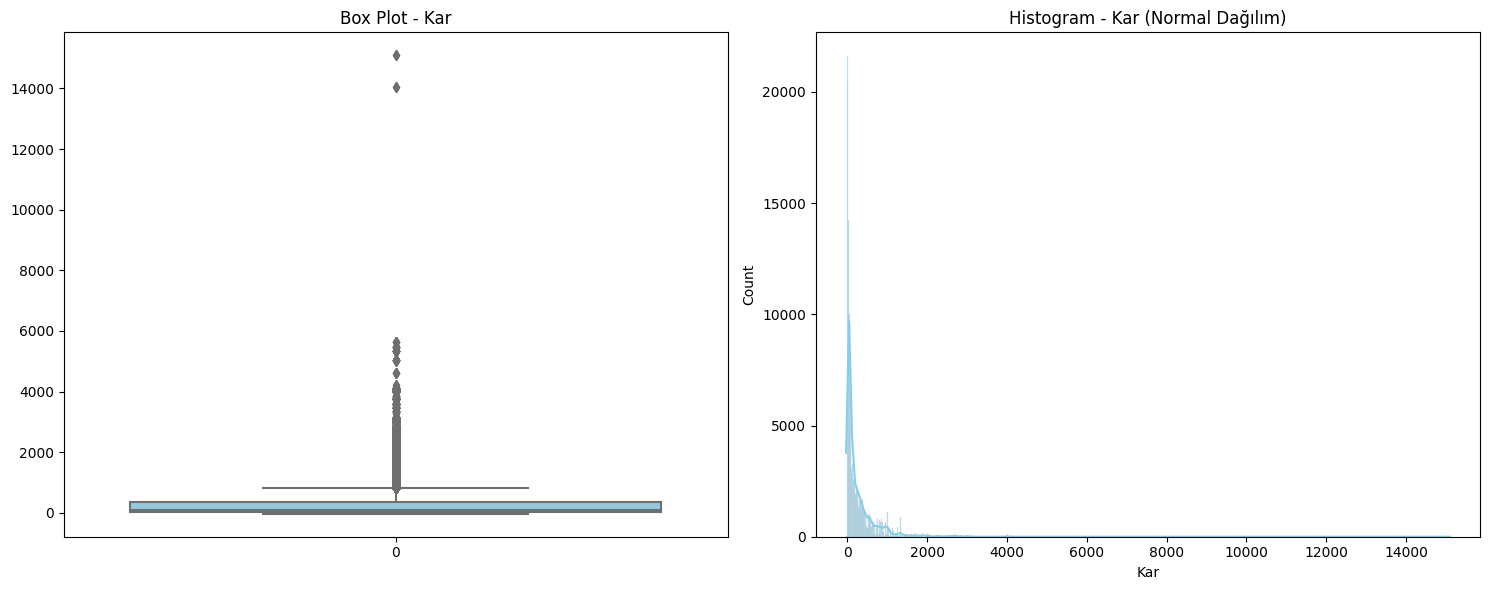

In [20]:
# 'Kar' sütunundaki veriyi al
kar_data = df['Kar']

# Box plot ve Histogram'ı aynı anda çizmek için subplot kullanıyoruz
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot çizimi
sns.boxplot(data=kar_data, ax=axes[0], color='skyblue')
axes[0].set_title('Box Plot - Kar')

# Histogram çizimi
sns.histplot(kar_data, kde=True, ax=axes[1], color='skyblue')
axes[1].set_title('Histogram - Kar (Normal Dağılım)')

plt.tight_layout()
plt.show()

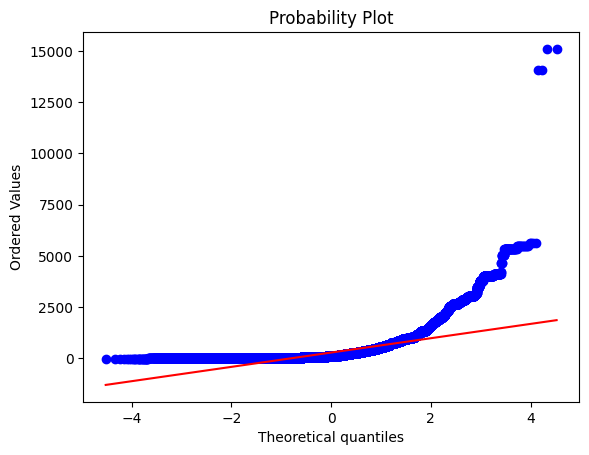

In [21]:
# Q-Q plotu
stats.probplot(df['Kar'], dist="norm", plot=plt)
plt.show()

In [22]:
bilgi_mini(df)

GENEL BİLGİ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226072 entries, 0 to 226071
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Tarih             226072 non-null  float64
 1   Gün               226072 non-null  float64
 2   Ay                226072 non-null  object 
 3   Yıl               226072 non-null  float64
 4   Müşteri_Yaşı      226072 non-null  float64
 5   Yaş_Grubu         226072 non-null  object 
 6   Müşteri_Cinsiyet  226072 non-null  object 
 7   Ülke              226072 non-null  object 
 8   Eyalet            226072 non-null  object 
 9   Ürün_Kategorisi   226072 non-null  object 
 10  Alt_Kategori      226072 non-null  object 
 11  Ürün              226072 non-null  object 
 12  Sipariş_Miktarı   226072 non-null  float64
 13  Birim_Maliyet     226072 non-null  float64
 14  Birim_Fiyat       226072 non-null  float64
 15  Kar            

# GRAFİKLER 

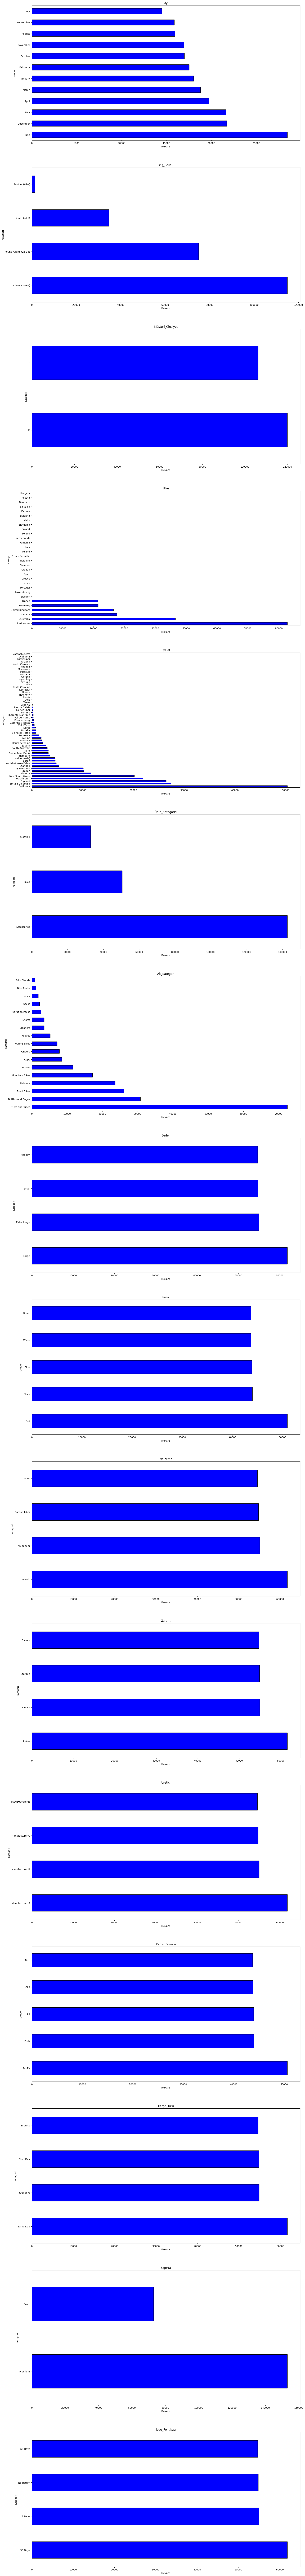

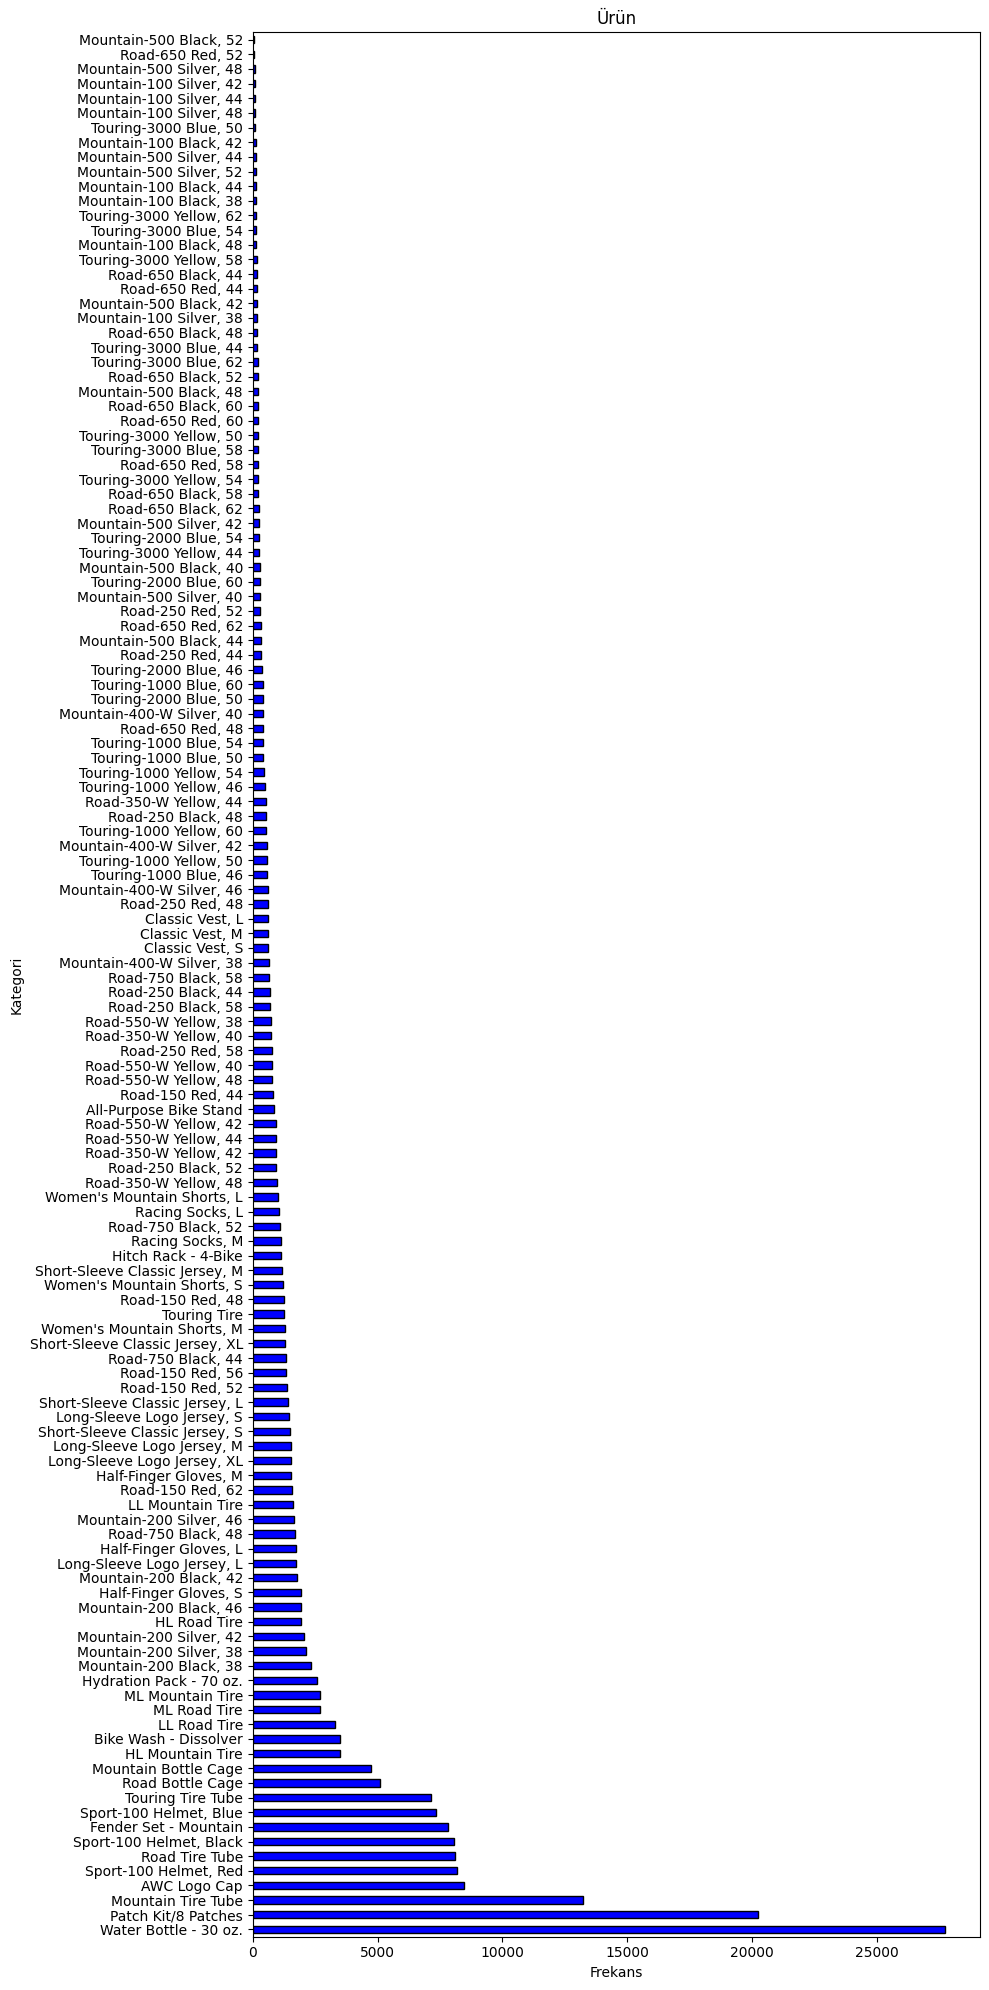

In [23]:
#OBJECT TÜRÜNDE SÜTUNLAR İÇİN GRAFİK ÇİZDİRME 
# Object tipindeki sütunları seçme
object_columns = df.select_dtypes(include='object').columns

# 'Ürün' sütununu çıkarma
object_columns = object_columns[object_columns != 'Ürün']

# Grafiklerin düzenini 3 sütunlu ve yeterli satırda ayarlayalıma
n_columns = 1
n_rows = (len(object_columns) // n_columns) + (1 if len(object_columns) % n_columns != 0 else 0)

# Grafiklerin yerleşimini ayarlama
fig, axes = plt.subplots(n_rows, n_columns, figsize=(20, 12 * n_rows))
axes = axes.flatten()  # Çok satırlı ve çok sütunlu düzeni tek bir diziye çevirme

# Her bir object sütunu için bar grafiği çizme döngüsü
for i, col in enumerate(object_columns):
    # Value counts ile barh grafik çizme
    df[col].value_counts().plot.barh(ax=axes[i], color='blue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('Frekans')
    axes[i].set_ylabel('Kategori')

# Boş kalan subplot'ları kaldırma
for i in range(len(object_columns), len(axes)):
    fig.delaxes(axes[i])

#ÜRÜN SÜTUNUNU AYRI YAPMA SEBEBİMİZ ÇOK FAZLA BENZERSİZ DEĞER OLDUĞUNU İÇİN BOYUTLARINI ARTTITRARAK DAHA OKUNABİLİR BOYUTLARDA AYARLANDI 
# Ürün sütunu için ayrı ve boyuna uzun bir grafik çizme
fig, ax = plt.subplots(figsize=(10, 20))  # Boyutu daha uzun yapıyoruz
df['Ürün'].value_counts().plot.barh(ax=ax, color='blue', edgecolor='black')
ax.set_title('Ürün')
ax.set_xlabel('Frekans')
ax.set_ylabel('Kategori')

# Layout'ı sıkıştır
plt.tight_layout()
plt.show()


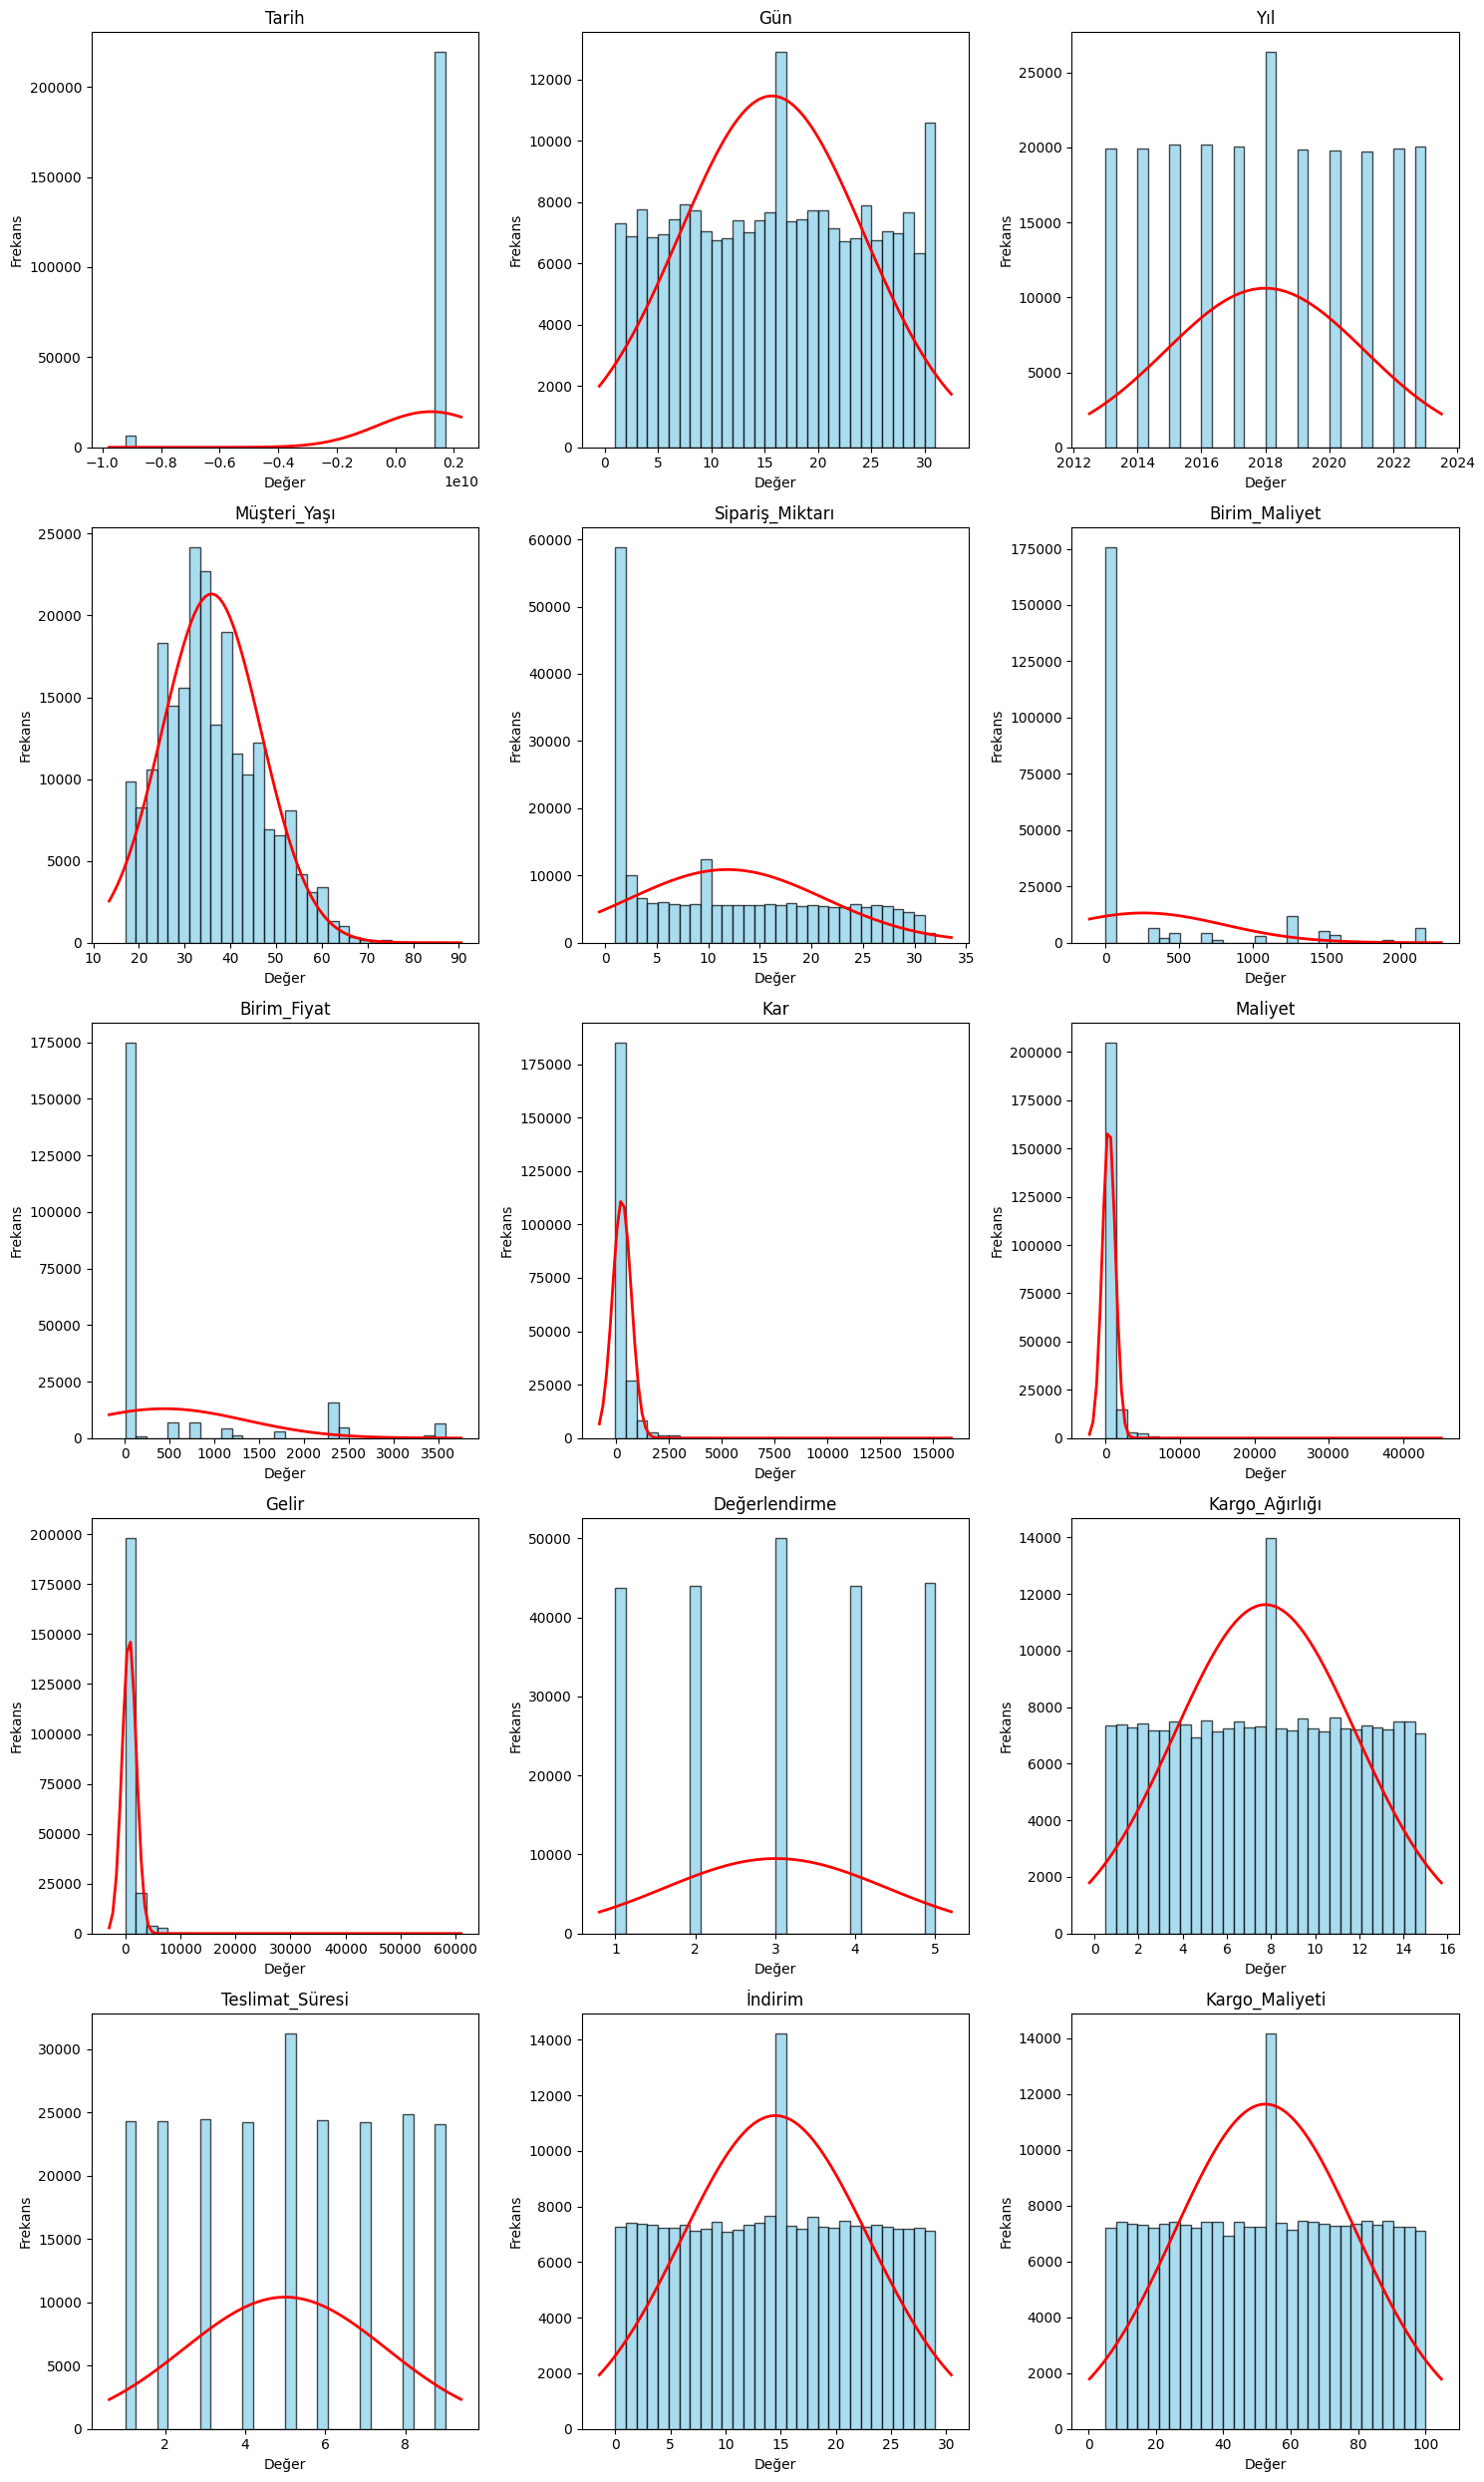

In [24]:
#İNT VE FLOAT TÜRÜNDEKİ DEĞERLER İÇİN GRAFİK ÇİZDİRME 
# Sayısal sütunlar
numeric_columns = ['Tarih', 'Gün', 'Yıl', 'Müşteri_Yaşı', 'Sipariş_Miktarı', 
                   'Birim_Maliyet', 'Birim_Fiyat', 'Kar', 'Maliyet', 'Gelir', 
                   'Değerlendirme', 'Kargo_Ağırlığı', 'Teslimat_Süresi', 'İndirim', 
                   'Kargo_Maliyeti']

# Grafiklerin düzenini 3x3 yapalım
n_columns = 3
n_rows = (len(numeric_columns) // n_columns) + (1 if len(numeric_columns) % n_columns != 0 else 0)

# Grafiklerin yerleşimi
fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Çok satırlı ve çok sütunlu düzeni tek bir diziye çevir

# Sayısal sütunlar için histogramlar ve çizgiler
for i, col in enumerate(numeric_columns):
    ax = axes[i]
    df[col].plot(kind='hist', bins=30, alpha=0.7, ax=ax, color='skyblue', edgecolor='black')

    # Histogram üzerinde çizgi ekleme
    mean = df[col].mean()
    std = df[col].std()
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    ax.plot(x, p * len(df[col]) * (xmax - xmin) / 30, 'r', linewidth=2)

    ax.set_title(col)
    ax.set_xlabel('Değer')
    ax.set_ylabel('Frekans')

# Boş kalan subplot'ları kaldırma
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

# Grafik düzenini ayarlama
plt.tight_layout()
plt.show()




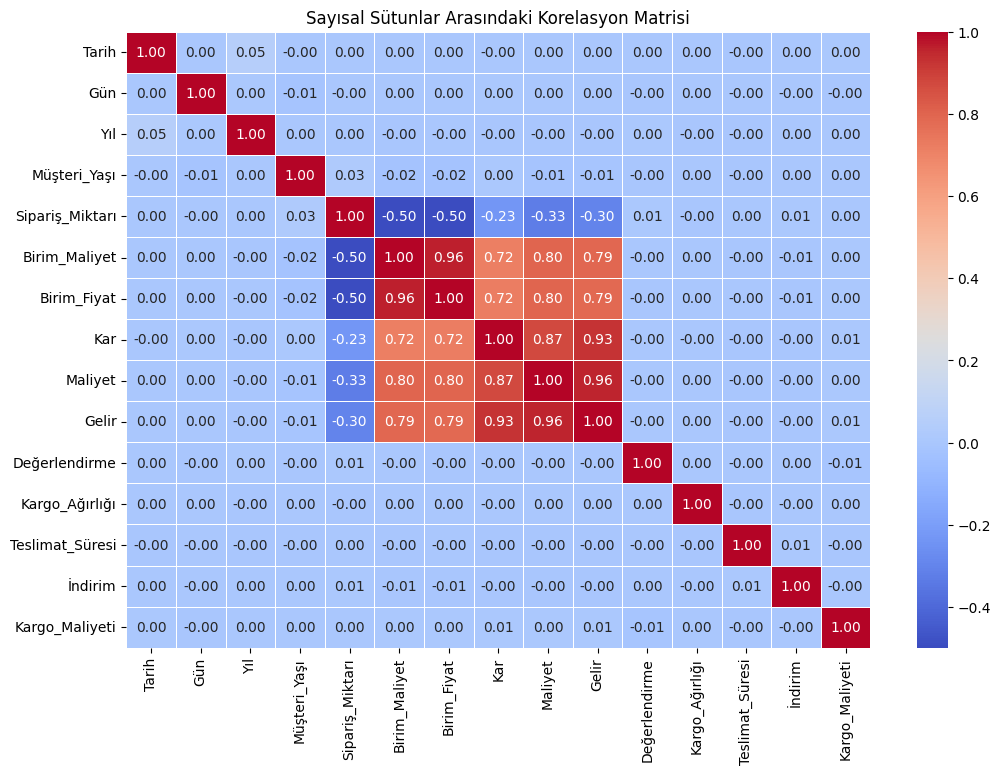

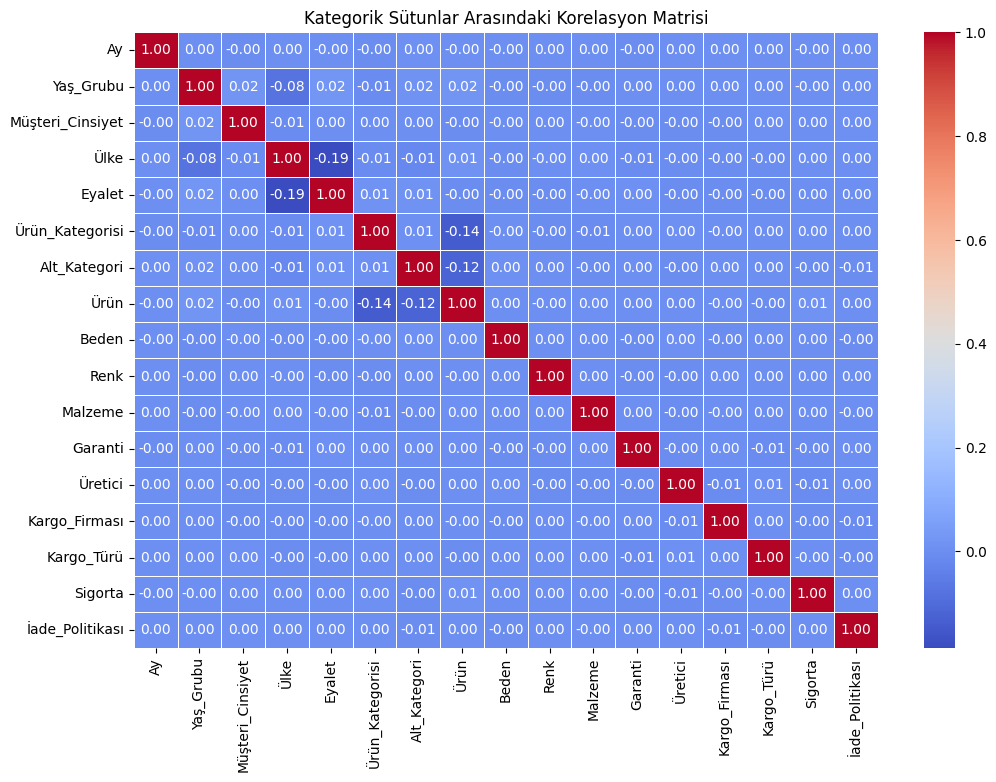

In [25]:
#KORELASYON MATRİSİ

# Sayısal sütunlar
numeric_columns = ['Tarih', 'Gün', 'Yıl', 'Müşteri_Yaşı', 'Sipariş_Miktarı', 
                   'Birim_Maliyet', 'Birim_Fiyat', 'Kar', 'Maliyet', 'Gelir', 
                   'Değerlendirme', 'Kargo_Ağırlığı', 'Teslimat_Süresi', 'İndirim', 
                   'Kargo_Maliyeti']

# Kategorik sütunlar
object_columns = ['Ay', 'Yaş_Grubu', 'Müşteri_Cinsiyet', 'Ülke', 'Eyalet', 'Ürün_Kategorisi', 
                  'Alt_Kategori', 'Ürün', 'Beden', 'Renk', 'Malzeme', 'Garanti', 'Üretici', 
                  'Kargo_Firması', 'Kargo_Türü', 'Sigorta', 'İade_Politikası']

# 1. Sayısal sütunlar için Korelasyon Matrisi
numeric_df = df[numeric_columns]
correlation_matrix_numeric = numeric_df.corr()

# Sayısal Korelasyon Matrisi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Sayısal Sütunlar Arasındaki Korelasyon Matrisi")
plt.show()

# 2. Kategorik sütunları sayısal verilere dönüştürme (Label Encoding)
le = LabelEncoder()
encoded_df = df[object_columns].apply(le.fit_transform)

# Kategorik Korelasyon Matrisi
correlation_matrix_object = encoded_df.corr()

# Kategorik Korelasyon Matrisi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_object, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Kategorik Sütunlar Arasındaki Korelasyon Matrisi")
plt.show()


In [26]:
bilgi(df)

GENEL BİLGİ
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226072 entries, 0 to 226071
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Tarih             226072 non-null  float64
 1   Gün               226072 non-null  float64
 2   Ay                226072 non-null  object 
 3   Yıl               226072 non-null  float64
 4   Müşteri_Yaşı      226072 non-null  float64
 5   Yaş_Grubu         226072 non-null  object 
 6   Müşteri_Cinsiyet  226072 non-null  object 
 7   Ülke              226072 non-null  object 
 8   Eyalet            226072 non-null  object 
 9   Ürün_Kategorisi   226072 non-null  object 
 10  Alt_Kategori      226072 non-null  object 
 11  Ürün              226072 non-null  object 
 12  Sipariş_Miktarı   226072 non-null  float64
 13  Birim_Maliyet     226072 non-null  float64
 14  Birim_Fiyat       226072 non-null  float64
 15  Kar            

# ÖZELLİK MÜHENDİSLĞİ

In [27]:
#İndirim sutünündaki dğerleri kullanarak İndirim aralığı adında bir sutun oluşturup burda 3 değerde bunları değıttık 
#Bu aralıkları belirlerken İndirim değişkeninin mean max min değerleri bakarak karar verdik 

def indirim_aralıgı(İndirim):
    if İndirim < 14.00:
        return 'Low Discount Rate'
    elif 14.00 <= İndirim <= 20.00:
        return 'Medium Discount Rate'
    else:
        return 'High Discount Rate'

df['İndirim_Aralığı'] = df['İndirim'].apply(indirim_aralıgı)

df.head(3)

,Tarih,Gün,Ay,Yıl,Müşteri_Yaşı,Yaş_Grubu,Müşteri_Cinsiyet,Ülke,Eyalet,Ürün_Kategorisi,...,Teslimat_Süresi,İndirim,Çevre_Dostu,Kargo_Maliyeti,Kargo_Firması,Kargo_Türü,Sigorta,İade_Politikası,Date_timestamp,İndirim_Aralığı
0,1.511654e+09,26.0,November,2017.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,...,2.0,25.0,True,40.58,GLS,Standard,Basic,30 Days,1.511654e+09,High Discount Rate
1,1.416960e+09,26.0,November,2014.0,19.0,Youth (<25),M,Canada,British Columbia,Accessories,...,5.0,1.0,True,95.32,Posti,Same Day,Premium,30 Days,1.416960e+09,Low Discount Rate
2,1.553299e+09,23.0,March,2019.0,49.0,Adults (35-64),M,Australia,New South Wales,Accessories,...,1.0,0.0,True,74.54,GLS,Express,Premium,7 Days,1.553299e+09,Low Discount Rate


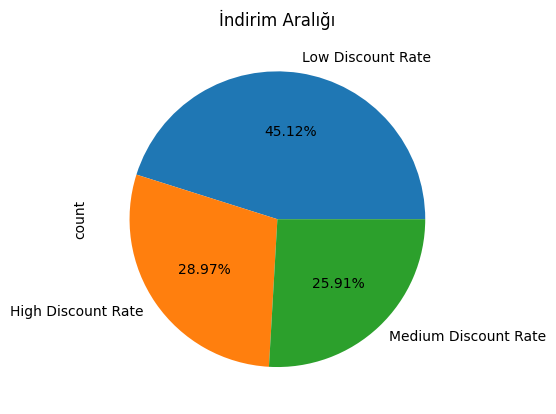

In [28]:
df['İndirim_Aralığı'].value_counts().plot(kind='pie' , autopct='%.2f%%',title= 'İndirim Aralığı')
plt.show()

In [29]:
#BU İŞLEMDEN SONRA DAHA İYİ BE DİREK SONUÇ VEREBİLEN ML MODELLERİNİDE KULLANABİLİRİZ